In [1]:
library(tidyverse)
library(topGO)
library(gprofiler2)
library(palmerpenguins)
library(ggthemes)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.5.1     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.1     ✔ stringr 1.5.1
✔ readr   2.1.5     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.3”
Warning message:
“package ‘readr’ was built under R version 4.2.3”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Warning message:
“package ‘topGO’ was built under R version 4.2.2”
Loading

1. The mpg data frame that is bundled with the ggplot2 package contains 234 observations collected by the US Environmental Protection Agency on 38 car models. Which variables in mpg are categorical? Which variables are numerical? (Hint: Type ?mpg to read the documentation for the dataset.) How can you see this information when you run mpg?

In [3]:
?mpg
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


mpg                  package:ggplot2                   R Documentation

_F_u_e_l _e_c_o_n_o_m_y _d_a_t_a _f_r_o_m _1_9_9_9 _t_o _2_0_0_8 _f_o_r _3_8 _p_o_p_u_l_a_r _m_o_d_e_l_s _o_f _c_a_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     This dataset contains a subset of the fuel economy data that the
     EPA makes available on <https://fueleconomy.gov/>. It contains
     only models which had a new release every year between 1999 and
     2008 - this was used as a proxy for the popularity of the car.

_U_s_a_g_e:

     mpg
     
_F_o_r_m_a_t:

     A data frame with 234 rows and 11 variables:

     manufacturer manufacturer name

     model model name

     displ engine displacement, in litres

     year year of manufacture

     cyl number of cylinders

     trans type of transmission

     drv the type of drive train, where f = front-wheel drive, r = rear
          wheel drive, 4 = 4wd

     cty city miles per gallon

     

Manufacturer, model, trans, drv, fl, and class are categorical. Displ, year, cyl, cty, and hwy are numerical. When you run mpg the type of data is listed under the name of the column.

2. Make a scatterplot of hwy vs. displ using the mpg data frame. Next, map a third, numerical variable to color, then size, then both color and size, then shape. How do these aesthetics behave differently for categorical vs. numerical variables?

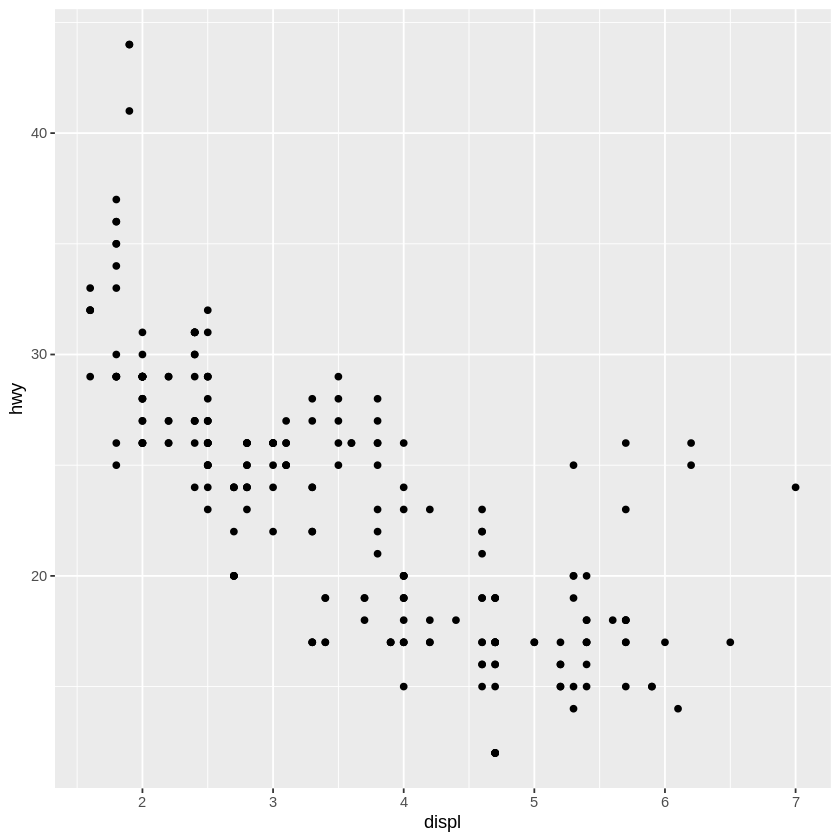

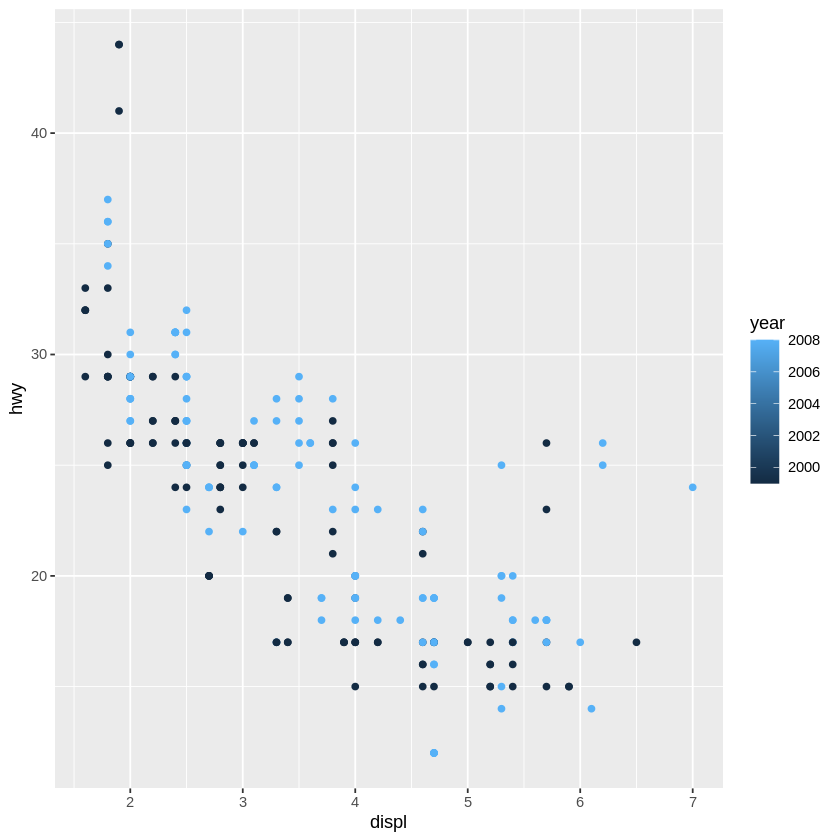

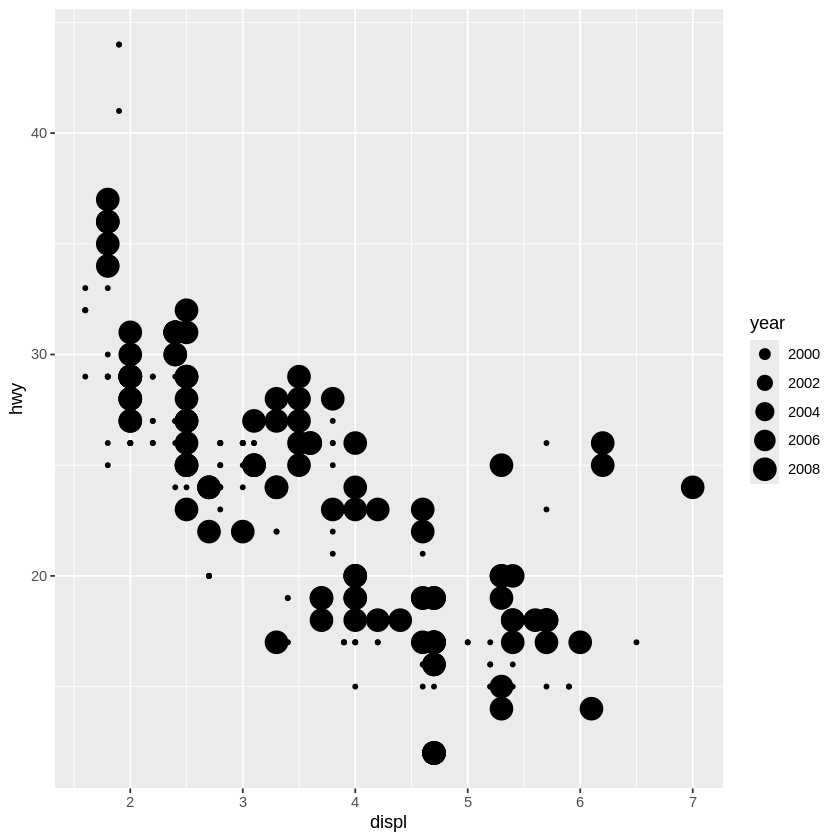

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `scale_f()`:
! A continuous variable cannot be mapped to the shape aesthetic.
ℹ Choose a different aesthetic or use `scale_shape_binned()`.

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .  

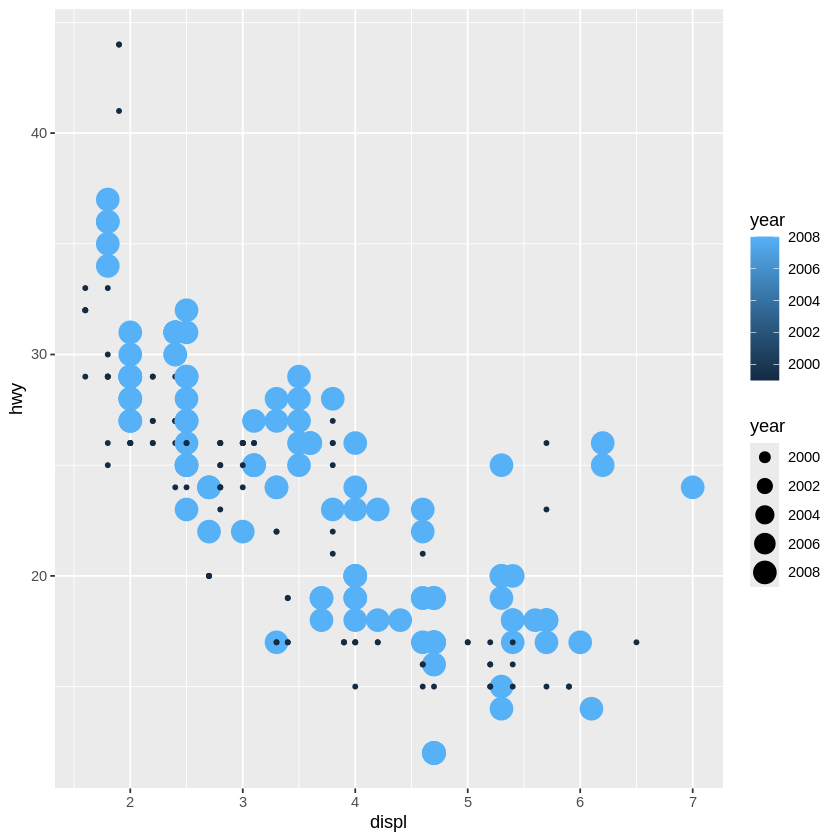

In [9]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, color = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, size = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, color = year, size = year)) +
    geom_point()

ggplot(mpg, aes(x = displ, y = hwy, shape = year)) +
    geom_point()

Since year is a continuous variable, it cannot be mapped to shape. It works fine when you map it to shape or size.

3. In the scatterplot of hwy vs. displ, what happens if you map a third variable to linewidth?

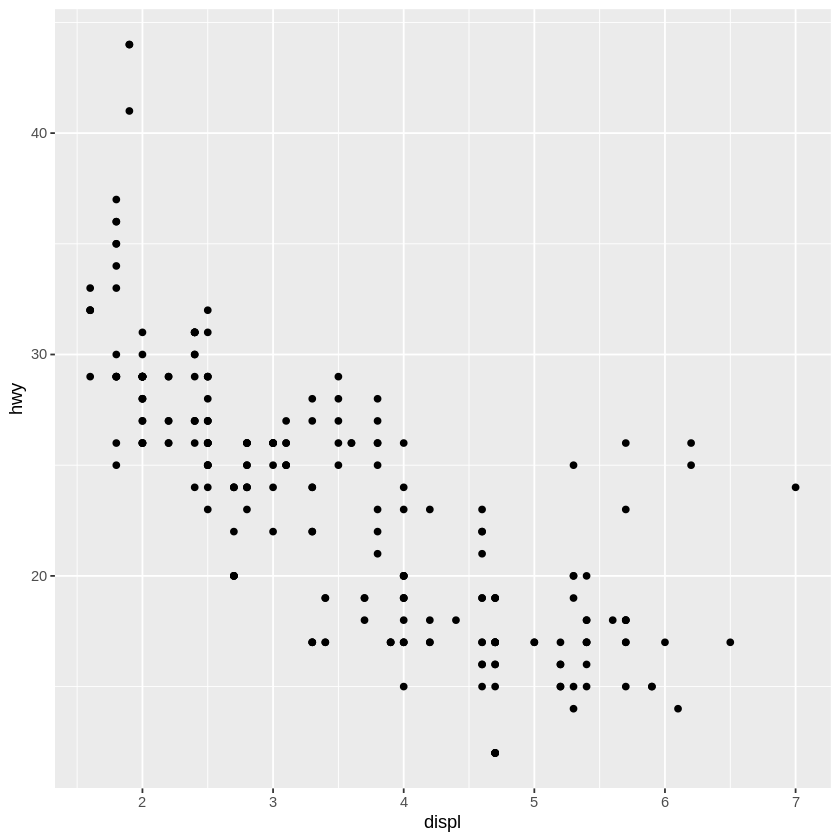

In [10]:
ggplot(mpg, aes(x = displ, y = hwy, linewidth = year)) +
    geom_point()

It has no error, but it doesn't really work as there is no line to determine the width of.

4. What happens if you map the same variable to multiple aesthetics?

5. Make a scatterplot of bill_depth_mm vs. bill_length_mm and color the points by species. What does adding coloring by species reveal about the relationship between these two variables? What about faceting by species?

6. Why does the following yield two separate legends? How would you fix it to combine the two legends?
```r
ggplot(
  data = penguins,
  mapping = aes(
    x = bill_length_mm, y = bill_depth_mm, 
    color = species, shape = species
  )
) +
  geom_point() +
  labs(color = "Species")
```

7. Create the two following stacked bar plots. Which question can you answer with the first one? Which question can you answer with the second one?
```r
ggplot(penguins, aes(x = island, fill = species)) +
  geom_bar(position = "fill")
ggplot(penguins, aes(x = species, fill = island)) +
  geom_bar(position = "fill")
```